In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from datetime import datetime

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Consutorias/Brasil Seg/data_raw/interacoes_callcenter.csv")

#Objetivo da Etapa
Realizar uma inspeção estrutural e qualitativa da base de interações, incluindo:

* Quantificação das dimensões (linhas e colunas);
* Inspeção dos tipos de variáveis e presença de categorias;
* Avaliação da completude dos dados (valores nulos);
* Exploração das principais variáveis categóricas: canal, motivo, resultado.

In [4]:
df.columns.tolist()

['id_interacao',
 'id_cliente',
 'canal',
 'motivo',
 'data_interacao',
 'resultado',
 'tempo_resposta_segundos',
 'atendente_id']

In [6]:
df.dtypes.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64')]

In [7]:
total_linhas = df.shape[0]
total_colunas = df.shape[1]

print(f"Composição do Dataframe: {total_linhas} linhas e {total_colunas} colunas.")

Composição do Dataframe: 800 linhas e 8 colunas.


In [16]:
canal = df["canal"].unique()
motivo = df["motivo"].unique()
data = df["data_interacao"].unique()
resultado = df["resultado"].unique()

print("*Classificação das variaveis categoricas*")
print(f"\n-Canal: {canal}")
print(f"-Motivo: {motivo}")
print(f"-Resultado: {resultado}")
print(f"-Data: {data}")

*Classificação das variaveis categoricas*

-Canal: ['telefone' 'agência' 'chat' 'app']
-Motivo: ['cotação' 'cancelamento' 'venda' 'pós-venda' 'dúvida']
-Resultado: ['concluído' 'reencaminhado' 'pendente']
-Data: ['2025-06-17' '2025-06-10' '2025-06-26' '2025-06-07' '2025-06-16'
 '2025-06-01' '2025-06-21' '2025-06-29' '2025-06-09' '2025-06-06'
 '2025-06-19' '2025-06-13' '2025-06-03' '2025-06-22' '2025-06-05'
 '2025-06-23' '2025-06-12' '2025-06-30' '2025-06-25' '2025-06-15'
 '2025-06-14' '2025-06-20' '2025-06-08' '2025-06-02' '2025-06-18'
 '2025-06-11' '2025-06-28' '2025-06-04' '2025-06-24' '2025-06-27']


In [24]:
total_na = df.isna().sum().sum()
na_variavel = df.isna().sum()

perc_na = na_variavel / total_linhas * 100

print(f"-Total de valores Null no DataFrame: {total_na}")
print(f"\npercentual de valores Null por variavesl: \n{perc_na}")

-Total de valores Null no DataFrame: 0

percentual de valores Null por variavesl: 
id_interacao               0.0
id_cliente                 0.0
canal                      0.0
motivo                     0.0
data_interacao             0.0
resultado                  0.0
tempo_resposta_segundos    0.0
atendente_id               0.0
dtype: float64


#Objetivo da Etapa
Validar a integridade cronológica da base interacoes_callcenter, garantindo que:

* Todos os registros possuam datas coerentes;
* Não existam datas futuras (inconsistência temporal típica);
* O campo de data (data_interacao) esteja corretamente convertido em datetime.

In [22]:
df["data_interacao"] = pd.to_datetime(df["data_interacao"], errors='coerce')

hoje = pd.Timestamp(datetime.today().date())

datas_futuras = df[df["data_interacao"] > hoje]["data_interacao"].unique()

if len(datas_futuras) > 0:
  print("Incoerencia identificada:")
  for d in sorted(datas_futuras):
    print(f"{d.date()}")
else:
      print("Não há data maior que atual")

Não há data maior que atual


#Objetivo da etapa
Resumo por Motivo de Atendimento
* **Objetivo**: Identificar os principais motivos que levam o cliente a acionar o call center.
* Métrica usada: frequência absoluta e percentual de cada tipo de motivo.
* Aplicação prática:
 *   Reforçar canais proativos em motivos frequentes;
 *   Mapear gargalos operacionais em atendimentos reincidentes.

In [27]:
motivo_atendimento = df.groupby("motivo").size()

motivo_perc = motivo_atendimento / motivo_atendimento.sum() * 100

motivo_resumo = pd.DataFrame({
    "quantidade": motivo_atendimento,
    "percentual": motivo_perc.round(2)
})

print(motivo_resumo)

              quantidade  percentual
motivo                              
cancelamento         153       19.12
cotação              173       21.62
dúvida               159       19.88
pós-venda            151       18.88
venda                164       20.50


In [30]:
canal_atendimento = df.groupby("canal").size()

canal_perc = canal_atendimento / canal_atendimento.sum() * 100

canal_resumo = pd.DataFrame({
    "qauntidade" : canal_atendimento,
    "percentual": canal_perc.round(2)
})

print(canal_resumo)

          qauntidade  percentual
canal                           
agência           74        9.25
app              256       32.00
chat             161       20.12
telefone         309       38.62


In [31]:
resultado_atendimento = df.groupby("resultado").size()

perc_resultado = resultado_atendimento / resultado_atendimento.sum() *100

resumo_resultado = pd.DataFrame({
    "quantidade": resultado_atendimento,
    "percentual": perc_resultado.round(2)

  })

print(resumo_resultado)

               quantidade  percentual
resultado                            
concluído             493       61.62
pendente              192       24.00
reencaminhado         115       14.37


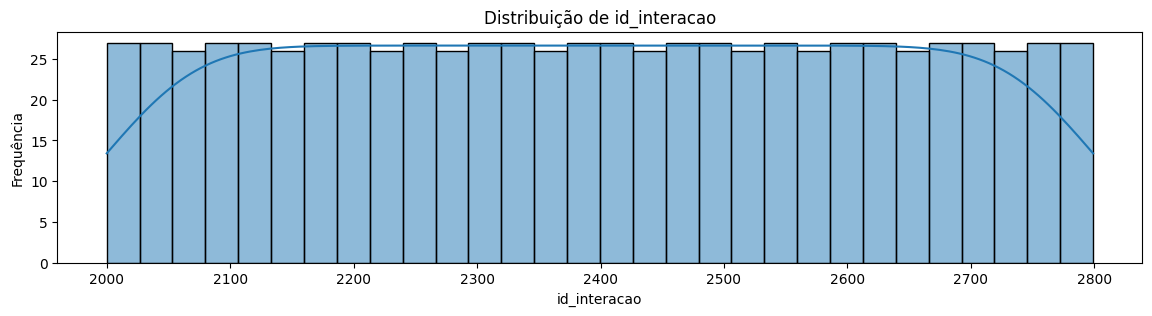

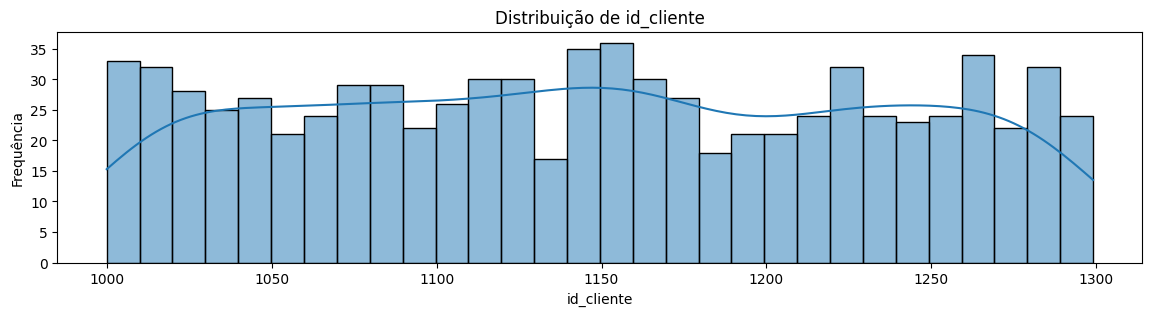

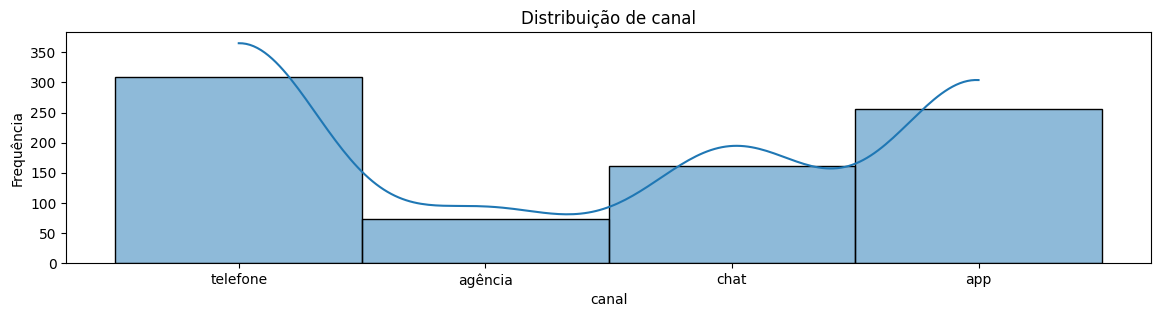

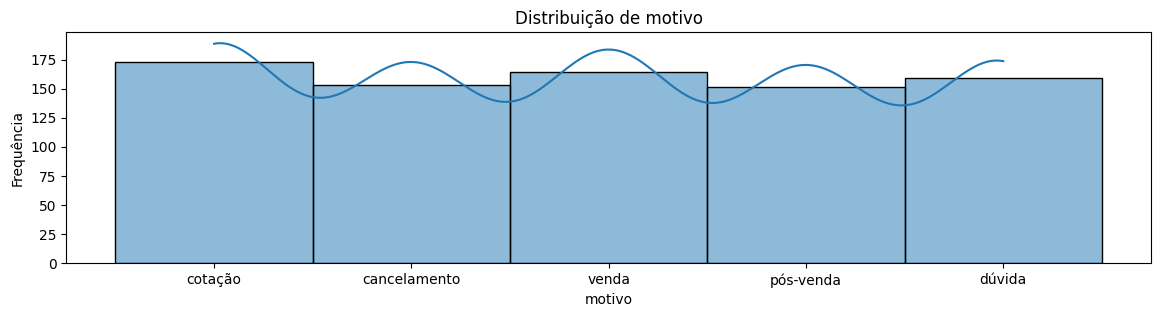

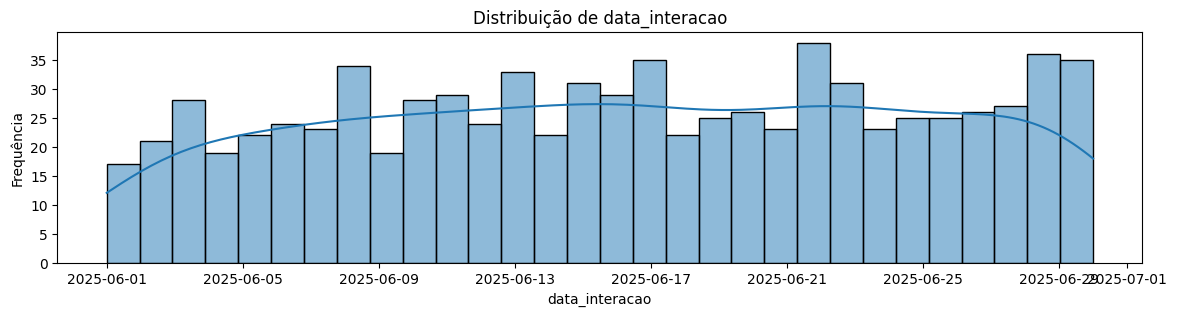

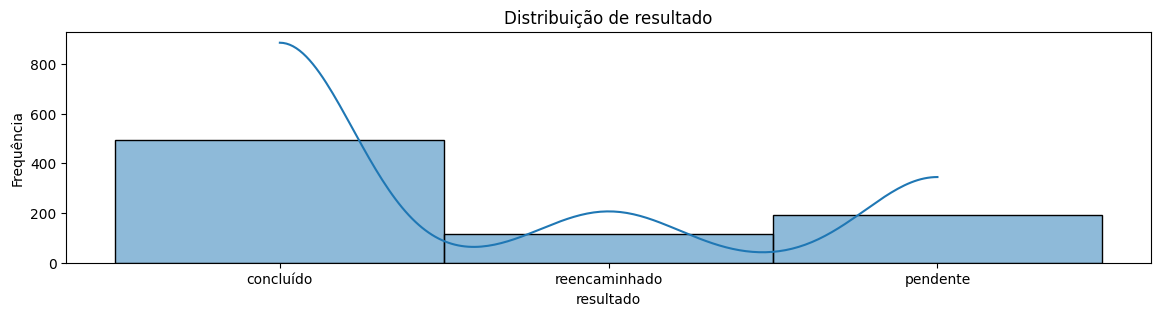

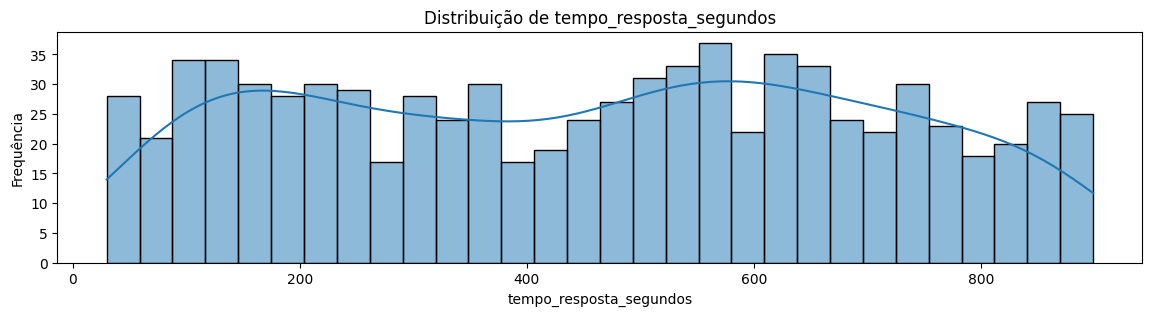

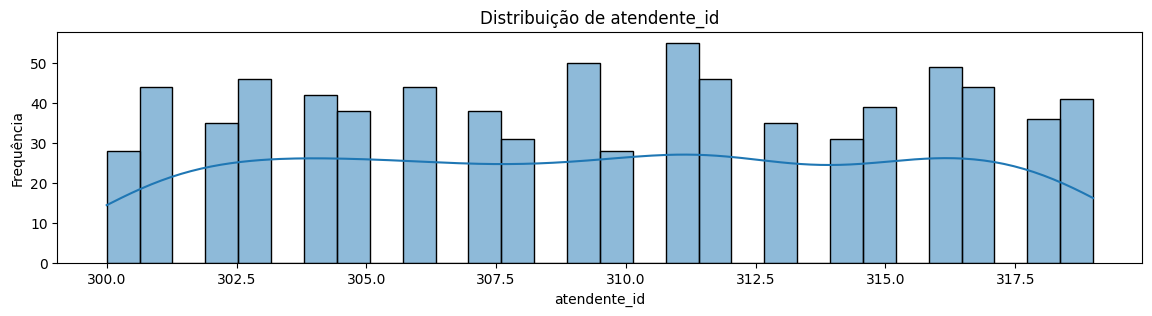

In [33]:
for col in df.columns:
    plt.figure(figsize=(14, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribuição de {col}")
    plt.ylabel("Frequência")
    plt.show()

#Objetivo da etapa

**Análise Temporal dos Atendimentos – Evolução Diária**

**Objetivo:**
Visualizar a distribuição bruta de atendimentos por dia, identificando períodos de alta ou baixa demanda.

**Conversão da Data e Cálculo de Crescimento Percentual**

**Objetivo**:
* Verificar variações percentuais diárias, úteis para detectar picos de entrada ou queda de demanda;
* Suporte à previsão de volume, planejamento de escala e horários críticos.

**Evolução Diária com Linha Temporal**

**Objetivo**:
* Visualização clara da tendência temporal;
* Ideal para identificar ciclos, sazonalidades e anomalias;
* O marcador (marker='o') facilita a leitura ponto a ponto.

**Média Móvel de 7 Dias – Suavização da Série**
**Objetivo**:
* Aplicar uma suavização estatística para reduzir o "ruído" e visualizar tendências mais claras.

<Axes: xlabel='data_interacao'>

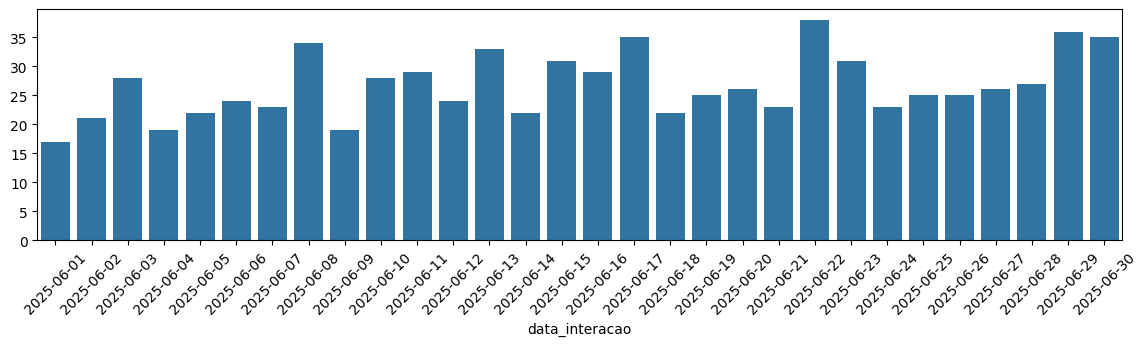

In [37]:
distribuicao_atendimento = df.groupby("data_interacao")["id_interacao"].count()

plt.figure(figsize=(14, 3))
plt.xticks(rotation=45)
sns.barplot(x=distribuicao_atendimento.index, y=distribuicao_atendimento.values)

In [38]:
df["data_interacao"] = pd.to_datetime(df["data_interacao"])
atendimentos_por_dia = df.groupby("data_interacao")["id_interacao"].count()

crescimento_percentual = atendimentos_por_dia.pct_change() * 100

print(crescimento_percentual.round(2))

data_interacao
2025-06-01      NaN
2025-06-02    23.53
2025-06-03    33.33
2025-06-04   -32.14
2025-06-05    15.79
2025-06-06     9.09
2025-06-07    -4.17
2025-06-08    47.83
2025-06-09   -44.12
2025-06-10    47.37
2025-06-11     3.57
2025-06-12   -17.24
2025-06-13    37.50
2025-06-14   -33.33
2025-06-15    40.91
2025-06-16    -6.45
2025-06-17    20.69
2025-06-18   -37.14
2025-06-19    13.64
2025-06-20     4.00
2025-06-21   -11.54
2025-06-22    65.22
2025-06-23   -18.42
2025-06-24   -25.81
2025-06-25     8.70
2025-06-26     0.00
2025-06-27     4.00
2025-06-28     3.85
2025-06-29    33.33
2025-06-30    -2.78
Name: id_interacao, dtype: float64


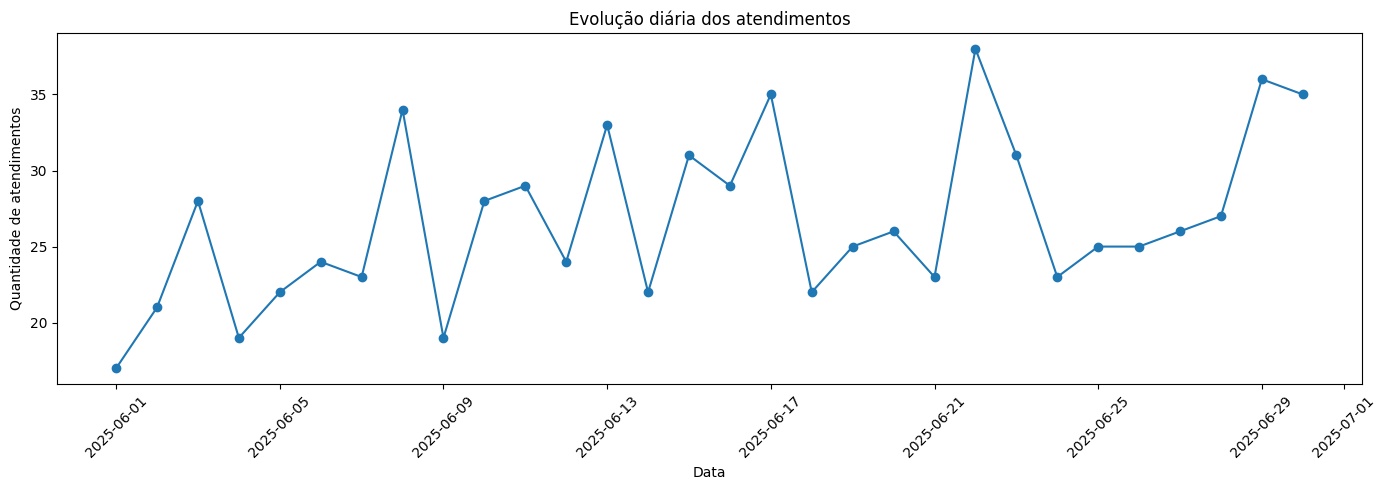

In [39]:
plt.figure(figsize=(14, 5))
plt.plot(atendimentos_por_dia.index, atendimentos_por_dia.values, marker='o')
plt.title("Evolução diária dos atendimentos")
plt.xlabel("Data")
plt.ylabel("Quantidade de atendimentos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

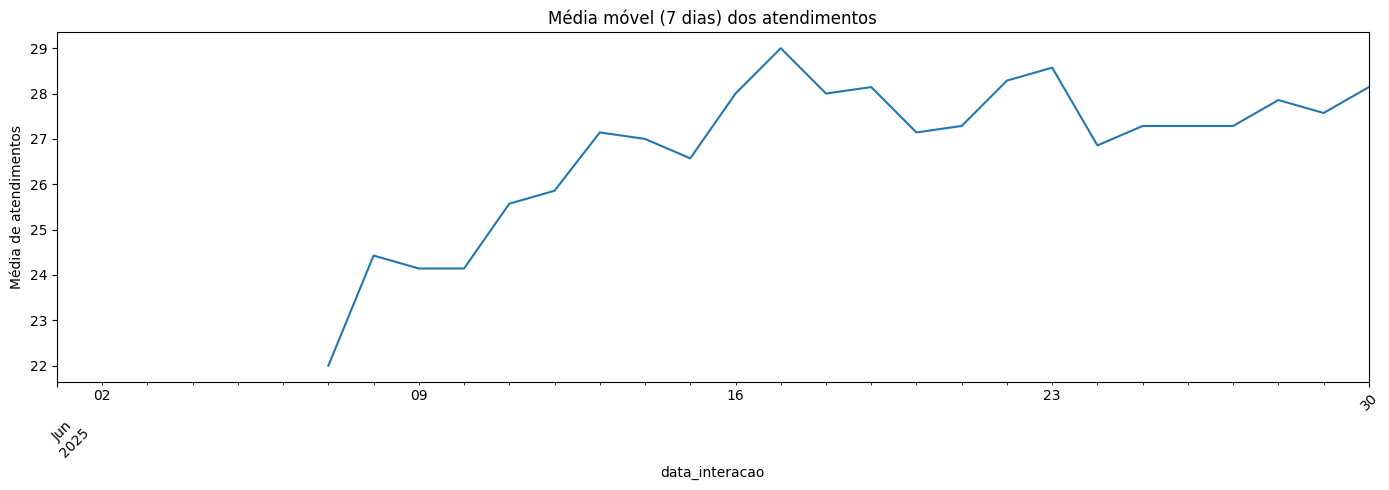

In [40]:
atendimentos_por_dia.rolling(window=7).mean().plot(figsize=(14, 5), title="Média móvel (7 dias) dos atendimentos")
plt.xticks(rotation=45)
plt.ylabel("Média de atendimentos")
plt.tight_layout()
plt.show()

#Objetivo da etapa

1. **Análise Focada em Vendas via Call Center**
* Cria uma coluna booleana (True/False) para isolar as interações cujo motivo foi "venda".
2. **Evolução Temporal das Vendas**
* Mostra a série temporal de interações com foco em venda;
* Ideal para observar tendências, sazonalidade e impacto de campanhas.
3. **Estatísticas Gerais de Volume de Vendas por Dia**
* Fornece métricas descritivas da frequência de vendas no tempo
4. **Vendas por Resultado da Interação**
* Mostra a proporção de vendas bem-sucedidas (ex: concluído) versus falhas ou desistências
5. **Vendas por Canal e Resultado**
* Analisa a efetividade de cada canal de atendimento em fechar vendas

<Axes: xlabel='data_interacao'>

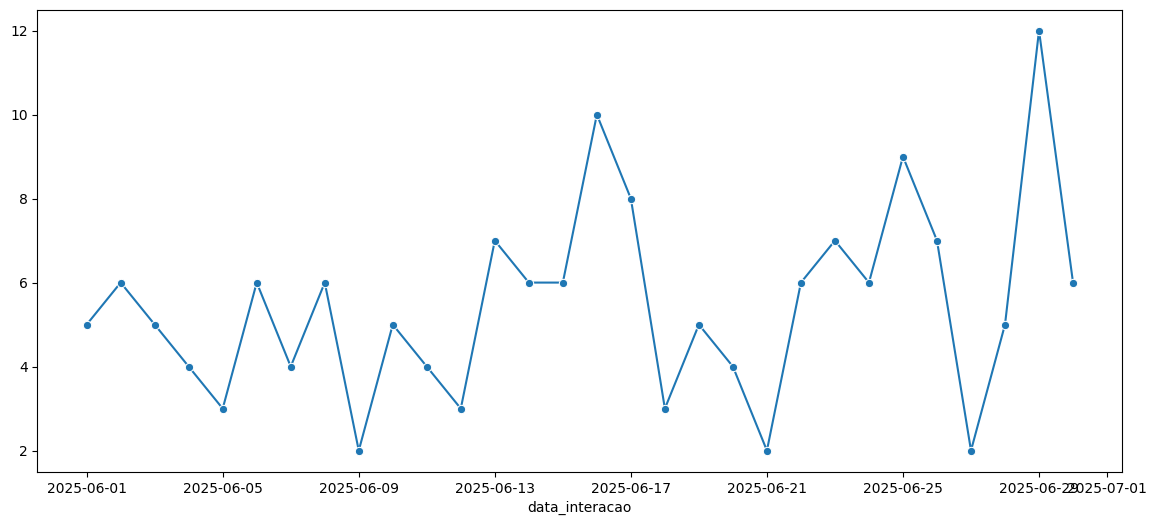

In [41]:
df["venda"] = df["motivo"]=="venda"
vendas_por_data = df.groupby("data_interacao")["venda"].sum()

plt.figure(figsize=(14, 6))
sns.lineplot(x=vendas_por_data.index, y=vendas_por_data.values, marker="o")

In [44]:
statis_venda = df[df["motivo"] == "venda"]
vendas_por_data = statis_venda.groupby("data_interacao").size()

print("Estatísticas de quantidade de vendas por data_interacao:")
print(f"- Média de vendas/dia: {vendas_por_data.mean():.2f}")
print(f"- Mínimo de vendas em um dia: {vendas_por_data.min()}")
print(f"- Máximo de vendas em um dia: {vendas_por_data.max()}")
print(f"- Total de dias com venda: {vendas_por_data.shape[0]}")

Estatísticas de quantidade de vendas por data_interacao:
- Média de vendas/dia: 5.47
- Mínimo de vendas em um dia: 2
- Máximo de vendas em um dia: 12
- Total de dias com venda: 30


In [43]:
vendas_por_resultado = df[df["motivo"] == "venda"].groupby("resultado").size()
total_vendas_resultado = vendas_por_resultado.sum()

perc_vendas_resultado = (vendas_por_resultado / total_vendas_resultado) * 100

resumo_vendas_resultado = pd.DataFrame({
    "quantidade": vendas_por_resultado,
    "percentual (%)": perc_vendas_resultado.round(2)
})

print("Vendas por resultado:")
print(resumo_vendas_resultado)

Vendas por resultado:
               quantidade  percentual (%)
resultado                                
concluído             109           66.46
pendente               32           19.51
reencaminhado          23           14.02


In [50]:
df_venda = df[df["motivo"] == "venda"]

vendas_por_canal_status = df_venda.groupby(["canal", "resultado"]).size().unstack(fill_value=0)

vendas_por_canal_status = vendas_por_canal_status.sort_values(by="concluído", ascending=False)

print("Vendas por canal e status:")
print(vendas_por_canal_status)

Vendas por canal e status:
resultado  concluído  pendente  reencaminhado
canal                                        
telefone          41        13              9
app               33        12              9
chat              24         5              3
agência           11         2              2


#Obijetivo da etapa
1. **Análise Temporal de Cancelamentos – Call Center**
* Objetivo: avaliar a intensidade e recorrência de pedidos de cancelamento ao longo do tempo.
* Métricas:
* Média diária de cancelamentos;
  * Extremos (mín/máx);
  * Total de dias com ocorrência registrada.

2. **Tendência Diária de Cancelamentos**
* Visualiza a flutuação diária de cancelamentos.
* Importância prática:
  * Identificação de picos (potenciais crises ou falhas operacionais);
  * Suporte à investigação de causas (ex: falha de produto, instabilidade técnica, comunicação mal interpretada).

3. **Tendência Suavizada – Média Móvel (7 dias)**
* Técnica: suavização estatística com janela de 7 dias;
* Permite identificar tendências reais sem a interferência de variações abruptas pontuais;
* Recurso fundamental para análises gerenciais e operacionais semanais.

In [46]:
statis_motivo = df[df["motivo"] == "cancelamento"]
motivo_data = statis_motivo.groupby("data_interacao").size()

print(f"-Estatisticas de cancelamento por Data")
print(f"-Média de cancelamento/dia: {motivo_data.mean()}")
print(f"-Mínimo de cancelamento em um dia: {motivo_data.min()}")
print(f"-Máximo de cancelamento em um dia: {motivo_data.max()}")
print(f"-Total de dias com cancelamento: {motivo_data.shape[0]}")


-Estatisticas de cancelamento por Data
-Média de cancelamento/dia: 5.1
-Mínimo de cancelamento em um dia: 2
-Máximo de cancelamento em um dia: 8
-Total de dias com cancelamento: 30


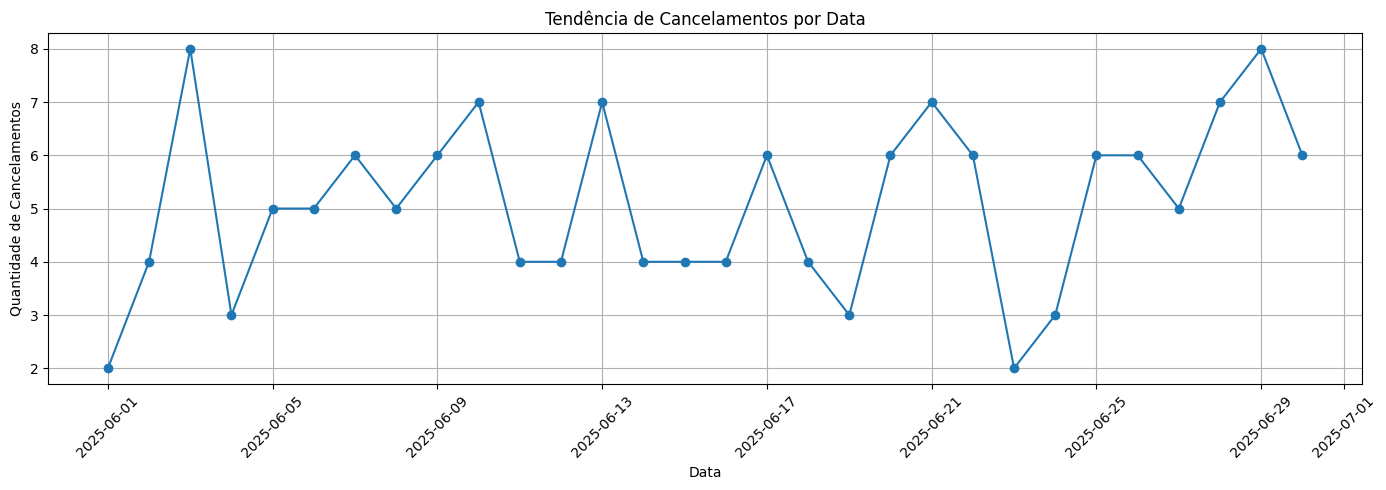

In [47]:
plt.figure(figsize=(14, 5))
plt.plot(motivo_data.index, motivo_data.values, marker='o', linestyle='-')
plt.title("Tendência de Cancelamentos por Data")
plt.xlabel("Data")
plt.ylabel("Quantidade de Cancelamentos")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

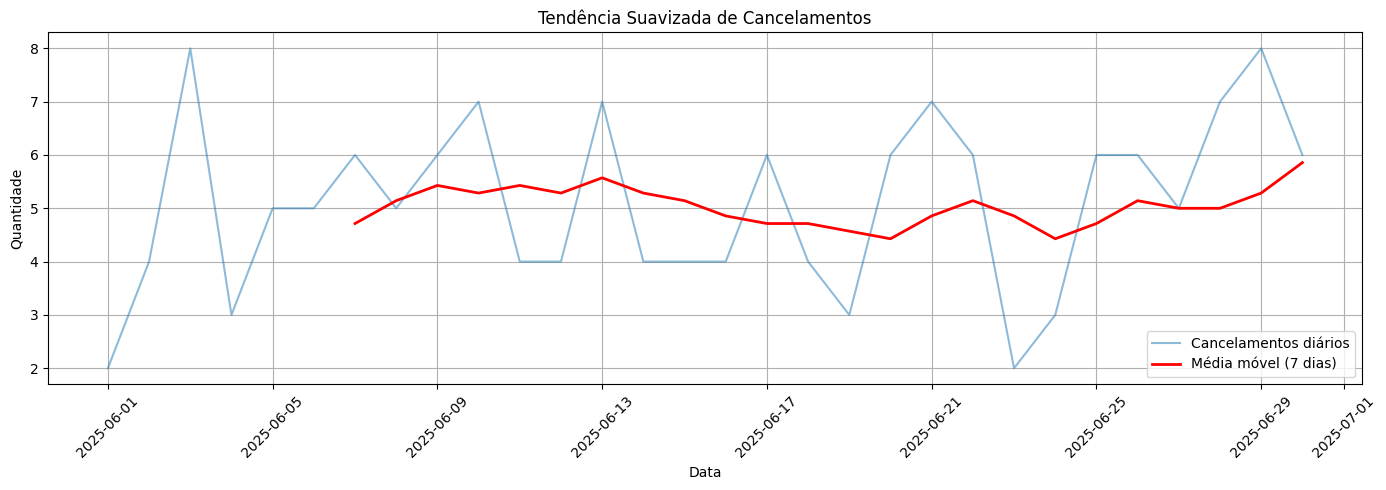

In [48]:
motivo_data_ma = motivo_data.rolling(window=7).mean()

plt.figure(figsize=(14, 5))
plt.plot(motivo_data.index, motivo_data.values, label="Cancelamentos diários", alpha=0.5)
plt.plot(motivo_data_ma.index, motivo_data_ma.values, label="Média móvel (7 dias)", color="red", linewidth=2)
plt.title("Tendência Suavizada de Cancelamentos")
plt.xlabel("Data")
plt.ylabel("Quantidade")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#Objetivo da etapa

1. **Análise Operacional por Canal e Eficiência de Vendas**
* Objetivo: Avaliar quanto tempo total de atendimento foi consumido em cada canal.
* Importância prática:
  * Identificação de gargalos operacionais (canais com alto tempo acumulado);
  * Suporte para decisões sobre automatização ou realocação de recursos.

2. **Eficiência de Vendas por Canal**
* Objetivo: Medir o percentual de vendas concluídas com sucesso por canal.
* Aplicação estratégica:
  * Reforçar canais com maior taxa de conversão;
  * Reavaliar canais com alto volume e baixa eficiência.

3. **Número Médio de Interações**
* Métrica: quantidade média de vezes que um cliente interagiu com o call center.

In [51]:
tempo_por_canal = df.groupby("canal")["tempo_resposta_segundos"].sum()
tempo_total_geral = tempo_por_canal.sum()

percentual_por_canal = (tempo_por_canal / tempo_total_geral) * 100

resumo_tempo = pd.DataFrame({
    "tempo_total_segundos": tempo_por_canal,
    "percentual (%)": percentual_por_canal.round(2)
})

print(resumo_tempo)

          tempo_total_segundos  percentual (%)
canal                                         
agência                  35912            9.88
app                     117172           32.23
chat                     73885           20.32
telefone                136601           37.57


In [52]:
df_venda = df[df["motivo"] == "venda"]

vendas_status = df_venda.groupby(["canal", "resultado"]).size().unstack(fill_value=0)

vendas_status["total"] = vendas_status.sum(axis=1)

if "concluído" not in vendas_status.columns:
    vendas_status["concluído"] = 0

vendas_status["eficiencia_%"] = (vendas_status["concluído"] / vendas_status["total"]) * 100

print("Eficiência por canal nas vendas (% concluído):")
print(vendas_status[["total", "concluído", "eficiencia_%"]].sort_values("eficiencia_%", ascending=False))

Eficiência por canal nas vendas (% concluído):
resultado  total  concluído  eficiencia_%
canal                                    
chat          32         24     75.000000
agência       15         11     73.333333
telefone      63         41     65.079365
app           54         33     61.111111


In [53]:
interações_cliente = df.groupby("id_cliente")["id_interacao"].count()
media_interacoes = interações_cliente.mean()

print(f"Média de interações por cliente: {media_interacoes:.2f}")

Média de interações por cliente: 2.84
